In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [77]:
!which python
print(tf.__version__)

/opt/anaconda3/envs/tf-env/bin/python
2.13.0


In [79]:
df = pd.read_csv('Plant_health_data.csv')

In [81]:
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [84]:
df.index = pd.to_datetime(df['Timestamp'])
df[:26]

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
Timestamp,,,,,,,,,,,,,,
2024-10-03 10:54:53.407995,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
2024-10-03 16:54:53.407995,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2024-10-03 22:54:53.407995,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
2024-10-04 04:54:53.407995,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
2024-10-04 10:54:53.407995,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
2024-10-04 16:54:53.407995,2024-10-04 16:54:53.407995,1,29.208365,24.364209,22.551551,46.392811,496.233040,6.157931,10.060115,15.610667,21.782672,45.052181,0.034302,High Stress
2024-10-04 22:54:53.407995,2024-10-04 22:54:53.407995,1,16.351409,23.022895,17.950348,56.906212,454.639214,7.075570,28.010890,32.564592,39.934656,49.232936,1.272921,High Stress
2024-10-05 04:54:53.407995,2024-10-05 04:54:53.407995,1,33.307697,20.199186,16.298221,56.326217,455.698975,6.105039,15.871379,10.454182,24.853727,33.925178,1.675545,Moderate Stress
2024-10-05 10:54:53.407995,2024-10-05 10:54:53.407995,1,12.722726,25.467645,16.693036,47.544175,635.057034,6.487872,45.630530,47.459179,12.451933,47.750350,1.391798,High Stress


In [86]:
print(df.columns.tolist())

['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status']


In [88]:
df = df[['Ambient_Temperature', 'Soil_Temperature', 'Humidity', 'Light_Intensity','Chlorophyll_Content', 'Electrochemical_Signal']]

In [90]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

import joblib

joblib.dump(scaler, 'scaler1.pkl')

['scaler1.pkl']

In [92]:
def create_sequences(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [94]:
window_size = 5
X, y = create_sequences(scaled_data, window_size=5)
X.shape, y.shape

((1195, 5, 6), (1195, 6))

In [96]:
train_size = int(len(X) * 0.6)
val_size = int(len(X) * 0.2)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(InputLayer(input_shape=(5, 6)))  
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 20454 (79.90 KB)
Trainable params: 20454 (79.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
cp1 = ModelCheckpoint('best_model2.keras', save_best_only=True, save_weights_only=True)

model.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])

In [102]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
23/23 [==============================] - 2s 63ms/step - loss: 0.3859 - root_mean_squared_error: 0.6212 - val_loss: 0.3438 - val_root_mean_squared_error: 0.5864
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3279 - root_mean_squared_error: 0.5727 - val_loss: 0.2919 - val_root_mean_squared_error: 0.5402
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2790 - root_mean_squared_error: 0.5282 - val_loss: 0.2490 - val_root_mean_squared_error: 0.4990
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2381 - root_mean_squared_error: 0.4880 - val_loss: 0.2123 - val_root_mean_squared_error: 0.4607
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2017 - root_mean_squared_error: 0.4491 - val_loss: 0.1785 - val_root_mean_squared_error: 0.4225
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1678 - root_mean_squared_error: 0.4096 - val_loss: 0.1481 - val_root_

In [103]:
model.save("best_model2.keras", save_format="keras")

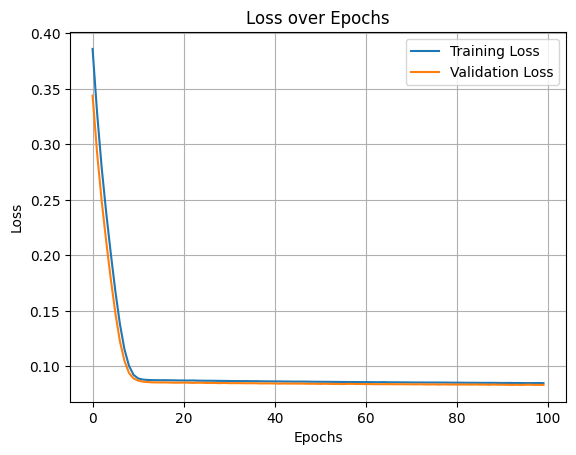

In [104]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

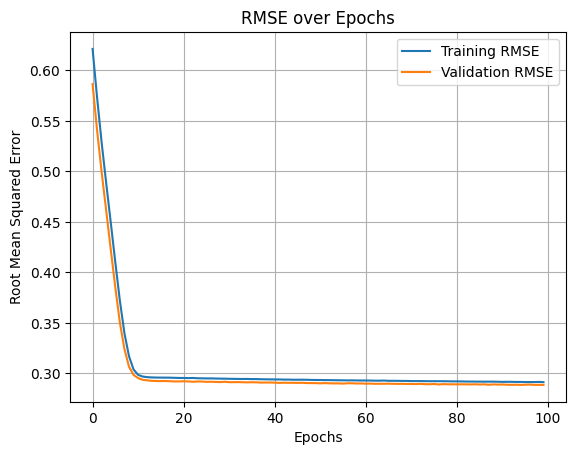

In [105]:
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [107]:

train_pred = model.predict(X_train)

pred_df = pd.DataFrame(train_pred, columns=[f'Pred_{i+1}' for i in range(train_pred.shape[1])])
actual_df = pd.DataFrame(y_train, columns=[f'Actual_{i+1}' for i in range(y_train.shape[1])])

train_results = pd.concat([pred_df, actual_df], axis=1)

23/23 [==============================] - 0s 2ms/step


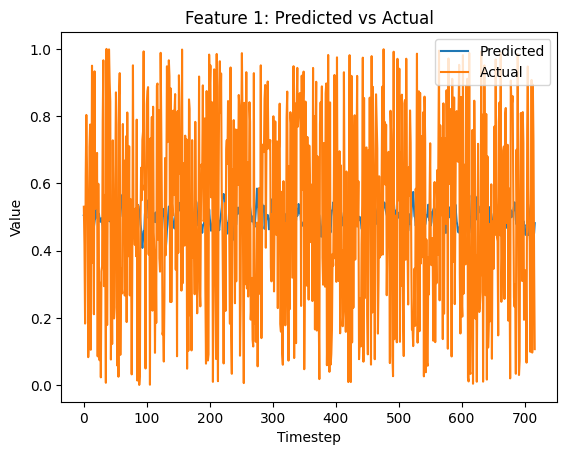

In [108]:
plt.plot(train_results['Pred_1'], label='Predicted')
plt.plot(train_results['Actual_1'], label='Actual')
plt.legend()
plt.title('Feature 1: Predicted vs Actual')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.show()

In [116]:
train_results

,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Actual_1,Actual_2,Actual_3,Actual_4,Actual_5,Actual_6
0,0.505624,0.515835,0.530692,0.483782,0.491634,0.478057,0.530676,0.755372,0.212559,0.369873,0.835188,0.016013
1,0.503951,0.490045,0.534307,0.479616,0.497344,0.492582,0.418796,0.294893,0.563707,0.317831,0.974708,0.637267
2,0.516831,0.515851,0.573720,0.506504,0.476771,0.506616,0.183269,0.129552,0.544335,0.319157,0.463859,0.839211
3,0.528476,0.507659,0.562521,0.527015,0.457539,0.504836,0.622714,0.169064,0.251015,0.543568,0.925231,0.696892
4,0.521835,0.516213,0.585986,0.530844,0.465724,0.504332,0.803635,0.862317,0.854606,0.241019,0.520202,0.481574
...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.447468,0.430765,0.440486,0.457436,0.452129,0.434767,0.096933,0.469373,0.117369,0.802094,0.026808,0.249174
713,0.439134,0.373314,0.387329,0.446649,0.434208,0.417237,0.893863,0.164707,0.851475,0.335332,0.366676,0.078494
714,0.441347,0.427656,0.380236,0.439144,0.434789,0.443818,0.725560,0.272793,0.344424,0.794137,0.450564,0.953877
715,0.452603,0.438541,0.448188,0.475711,0.446656,0.460660,0.363599,0.483374,0.473408,0.270216,0.143508,0.056526


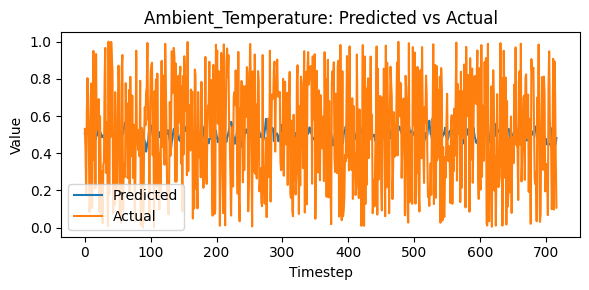

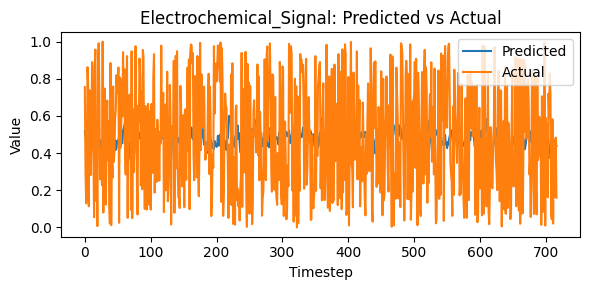

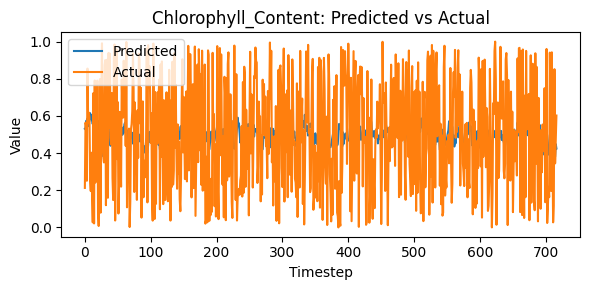

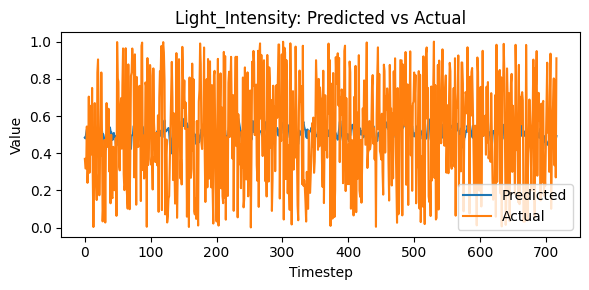

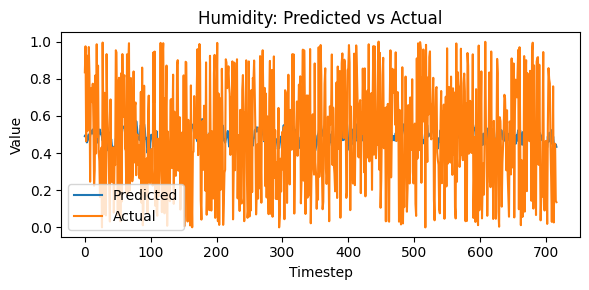

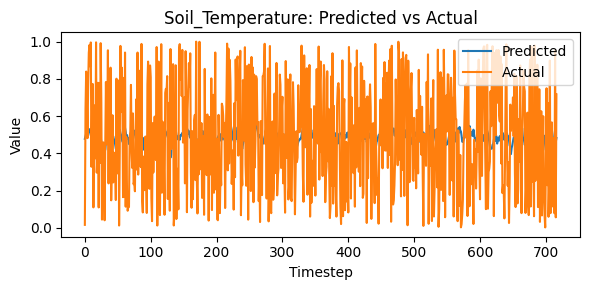

In [118]:
for i in range(1, 7):  
    plt.figure(figsize=(6, 3))
    plt.plot(train_results[f'Pred_{i}'], label='Predicted')
    plt.plot(train_results[f'Actual_{i}'], label='Actual')
    plt.legend()
    plt.title(f'{df.columns[1-i]}: Predicted vs Actual')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

In [120]:
combined_scaled = np.vstack((train_pred, y_train))  
combined_inversed = scaler.inverse_transform(combined_scaled)

In [122]:
n_samples = train_pred.shape[0]
inversed_pred = combined_inversed[:n_samples]
inversed_actual = combined_inversed[n_samples:]

In [124]:
inversed_df = pd.DataFrame(
    np.hstack((inversed_pred, inversed_actual)),
    columns=[f'Pred_{i+1}' for i in range(6)] + [f'Actual_{i+1}' for i in range(6)]
)

In [126]:
print(inversed_df.head())


      Pred_1     Pred_2     Pred_3      Pred_4     Pred_5    Pred_6  \
0  24.063870  20.158043  55.917743  587.273970  34.757468  0.955497   
1  24.043808  19.900344  56.025984  583.944041  34.928576  0.984456   
2  24.198224  20.158208  57.205986  605.433800  34.312097  1.012437   
3  24.337834  20.076354  56.870699  621.827052  33.735796  1.008888   
4  24.258219  20.161822  57.573260  624.887919  33.981081  1.007884   

    Actual_1   Actual_2   Actual_3    Actual_4   Actual_5  Actual_6  
0  24.364209  22.551551  46.392811  496.233040  45.052181  0.034302  
1  23.022895  17.950348  56.906212  454.639214  49.232936  1.272921  
2  20.199186  16.298221  56.326217  455.698975  33.925178  1.675545  
3  25.467645  16.693036  47.544175  635.057034  47.750350  1.391798  
4  27.636685  23.620169  65.615769  393.247781  35.613519  0.962509  


In [129]:
print(tf.__version__)

2.13.0
